## Synthetic data

Small example of how to use the synthetic data generator. Not sure if we will include this or a version of this in the public release of TOAD, but I think it's good for testing TOAD.


In [1]:
# Prerequisites
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

In [2]:
from toad import TOAD
from toad.shifts import ASDETECT
from sklearn.cluster import HDBSCAN
from toad.visualisation.toad_plotter import PlotConfig
from toad.utils import create_global_dataset

<xarray.Dataset> Size: 13MB
Dimensions:  (time: 100, lat: 90, lon: 180)
Coordinates:
  * time     (time) float64 800B 0.0 1.01 2.02 3.03 ... 96.97 97.98 98.99 100.0
  * lat      (lat) float64 720B -90.0 -87.98 -85.96 -83.93 ... 85.96 87.98 90.0
  * lon      (lon) float64 1kB -180.0 -178.0 -176.0 -174.0 ... 176.0 178.0 180.0
    x        (lat, lon) float64 130kB -3.919e-13 -3.916e-13 ... -3.919e-13
    y        (lat, lon) float64 130kB -4.799e-29 -1.375e-14 ... 4.799e-29
    z        (lat, lon) float64 130kB -6.357e+03 -6.357e+03 ... 6.357e+03
Data variables:
    value    (time, lat, lon) float64 13MB 0.01789 0.008743 ... -0.005526

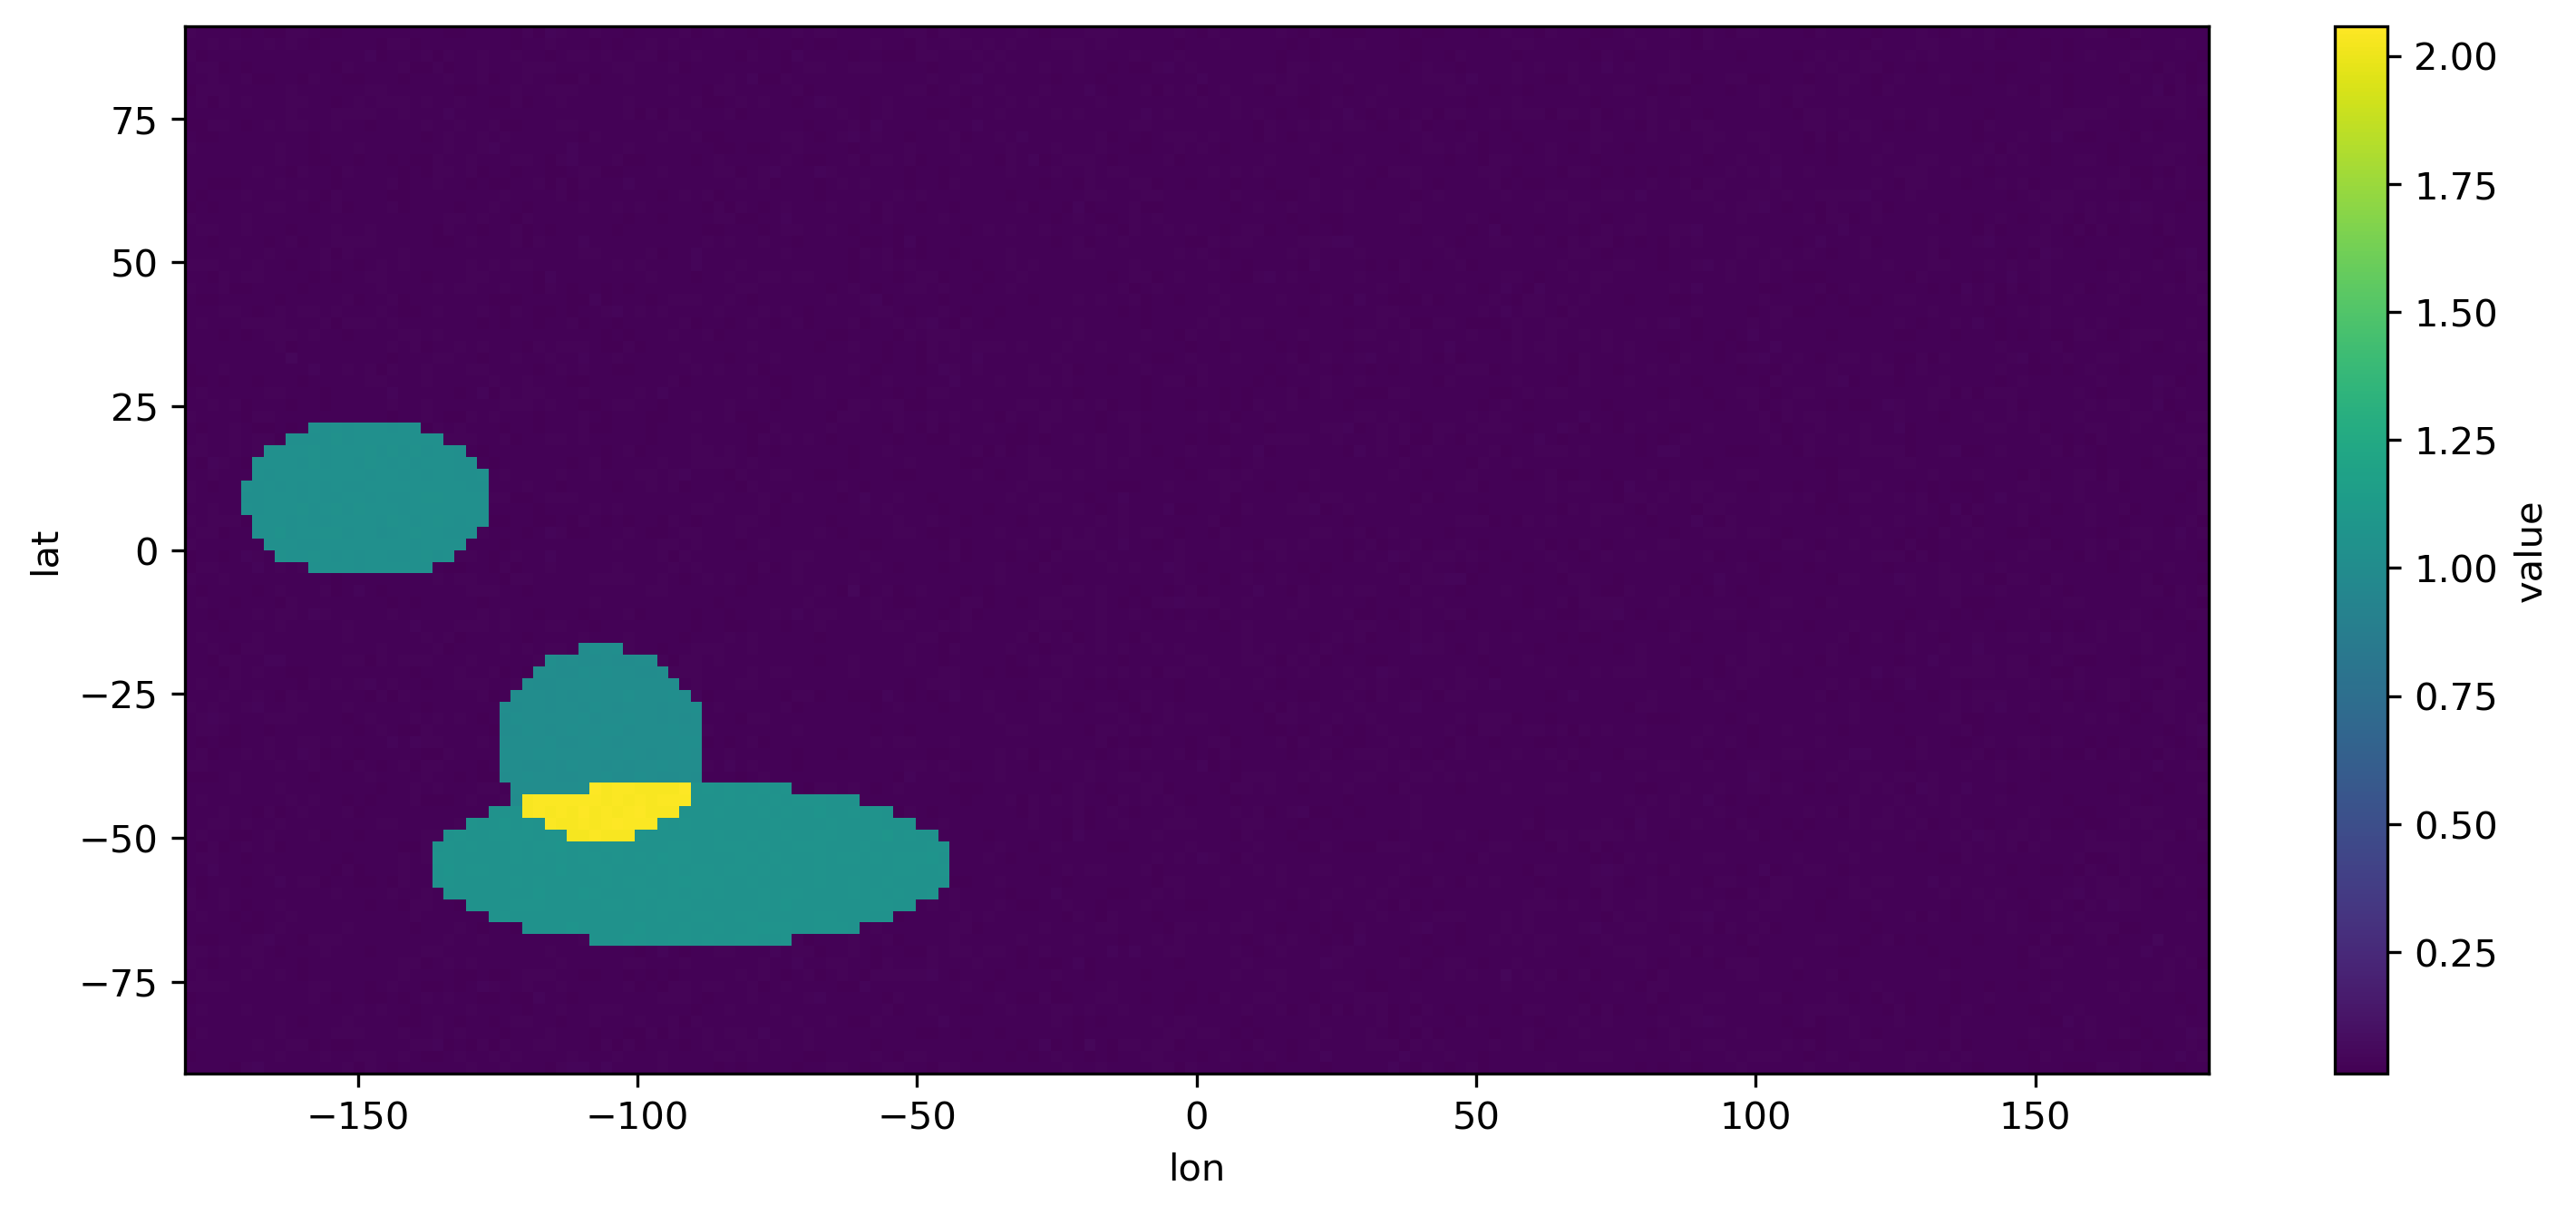

In [3]:
# Generate syntheitc data
data_ds, labels_xr, shift_params = create_global_dataset(
    lat_size=90,
    lon_size=180,
    time_size=100,
    n_shifts=3,
    random_seed=3,
    background_noise=0.01,
    background_trend=0.0,
)

data_ds.value.max(dim="time").plot()
data_ds

Create different synthetic data sets from random seed, compute shifts and clusters, and plot along with true regions of shift.


In [ ]:
# from ipywidgets import interact
# @interact(random_seed=(1, 100, 1))
def plot(random_seed=0):
    data_ds, labels_xr, shift_params = create_global_dataset(
        lat_size=60,
        lon_size=120,
        time_size=100,
        n_shifts=3,
        random_seed=random_seed,
        background_noise=0.01,
    )

    td = TOAD(data_ds)
    td.compute_shifts("value", ASDETECT())
    td.compute_clusters(
        "value",
        HDBSCAN(min_cluster_size=10),
        shift_threshold=0.9,
    )

    plt.rcParams["figure.dpi"] = 300

    plotter = td.plot(
        PlotConfig(
            map_frame=False,
            grid_labels=False,
        )
    )

    plotter.cluster_overview(
        "value",
        range(10),
        cmap="tab10",
        timeseries_kwargs={},
        map_kwargs={"plot_contour": False},
        figsize=(16, 5),
    )

    # Plot true shift locations
    fig, ax = plotter.map(figsize=(16, 4))
    labels_xr.max(dim="time").plot(ax=ax, cmap="Blues")
    ax.set_title("True shift locations")

    # plot cluster timeseries
    fig, axs = plt.subplots(2, 1, figsize=(16, 4))
    plotter.cluster_timeseries("value", td.get_cluster_ids("value"), ax=axs[0])

    # plot data timeseries
    td.data.value.toad.to_timeseries().plot.line(
        x="time", add_legend=False, color="k", alpha=0.1, ax=axs[1]
    )
    axs[0].set_title(f"Cluster {td.get_cluster_ids('value')} timeseries")
    axs[1].set_title("All data timeseries")

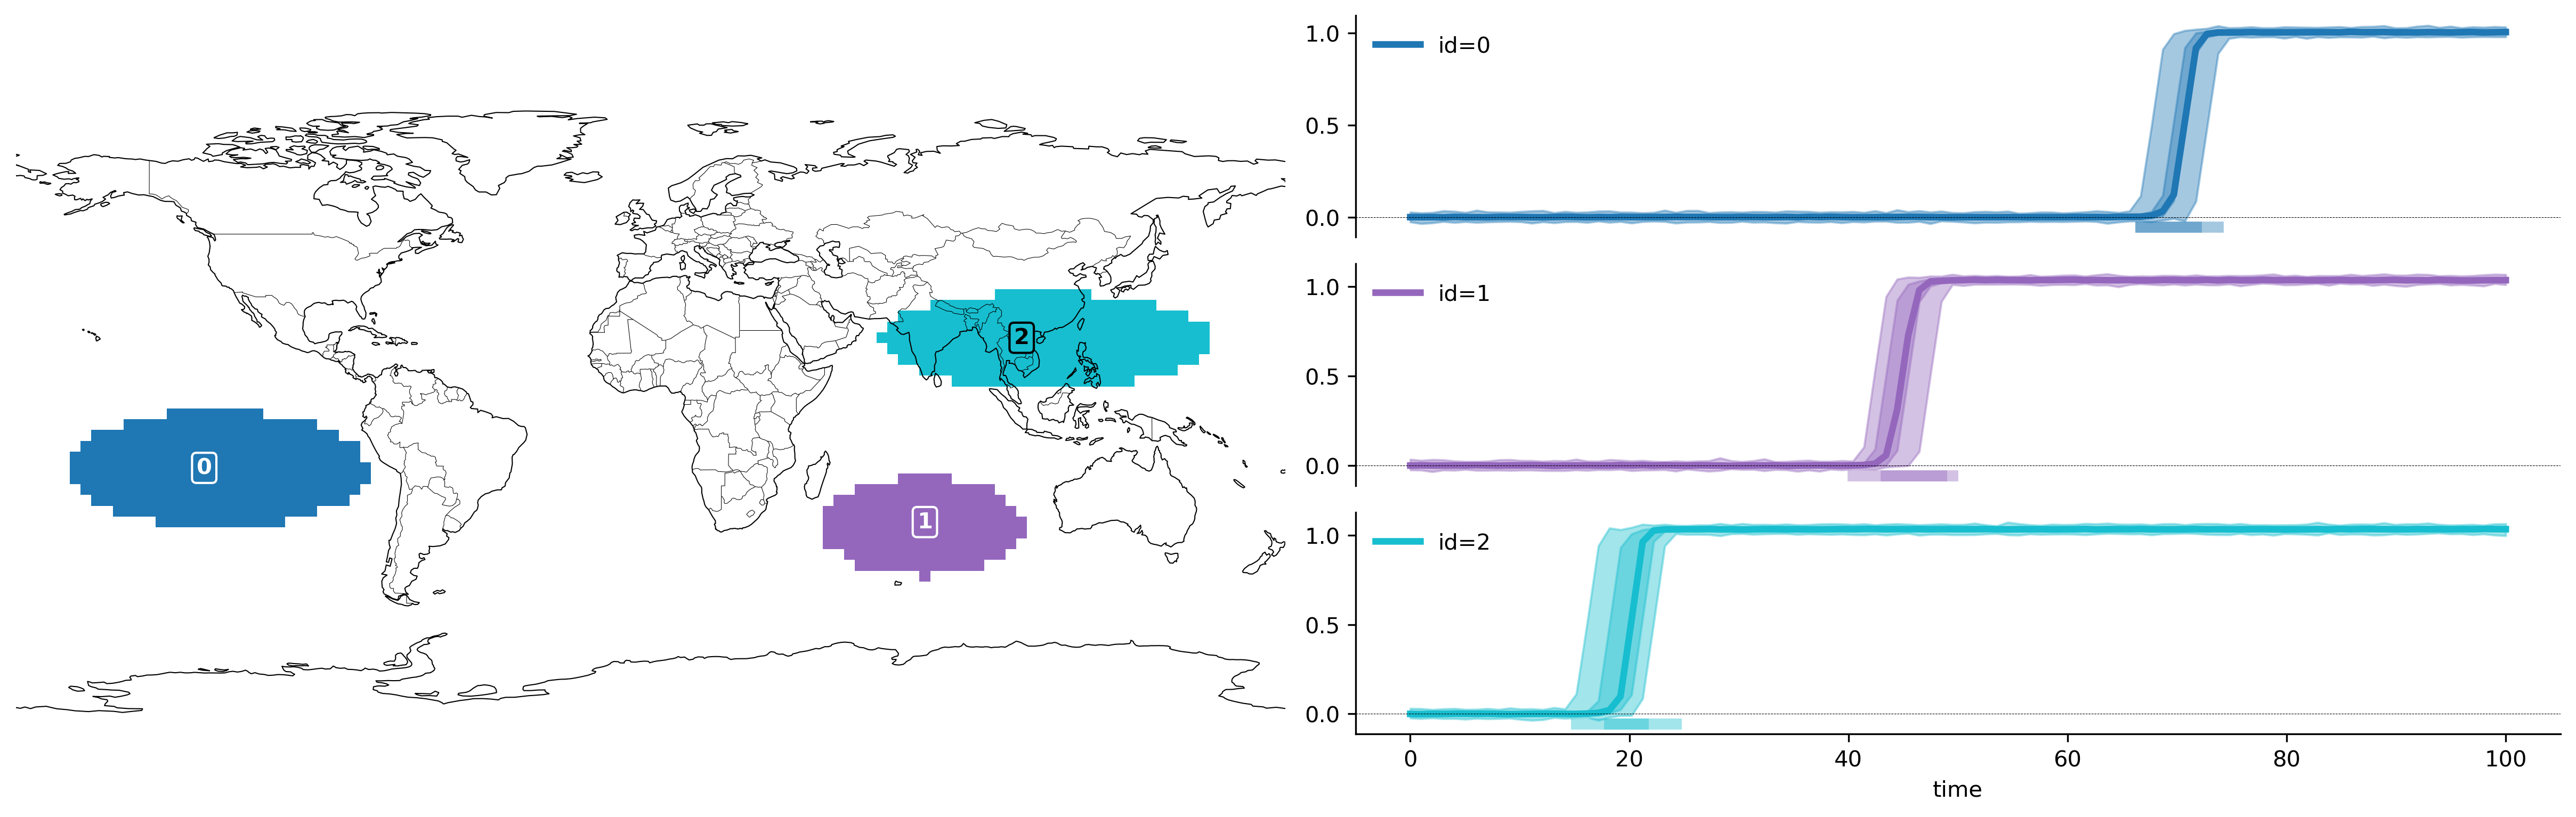

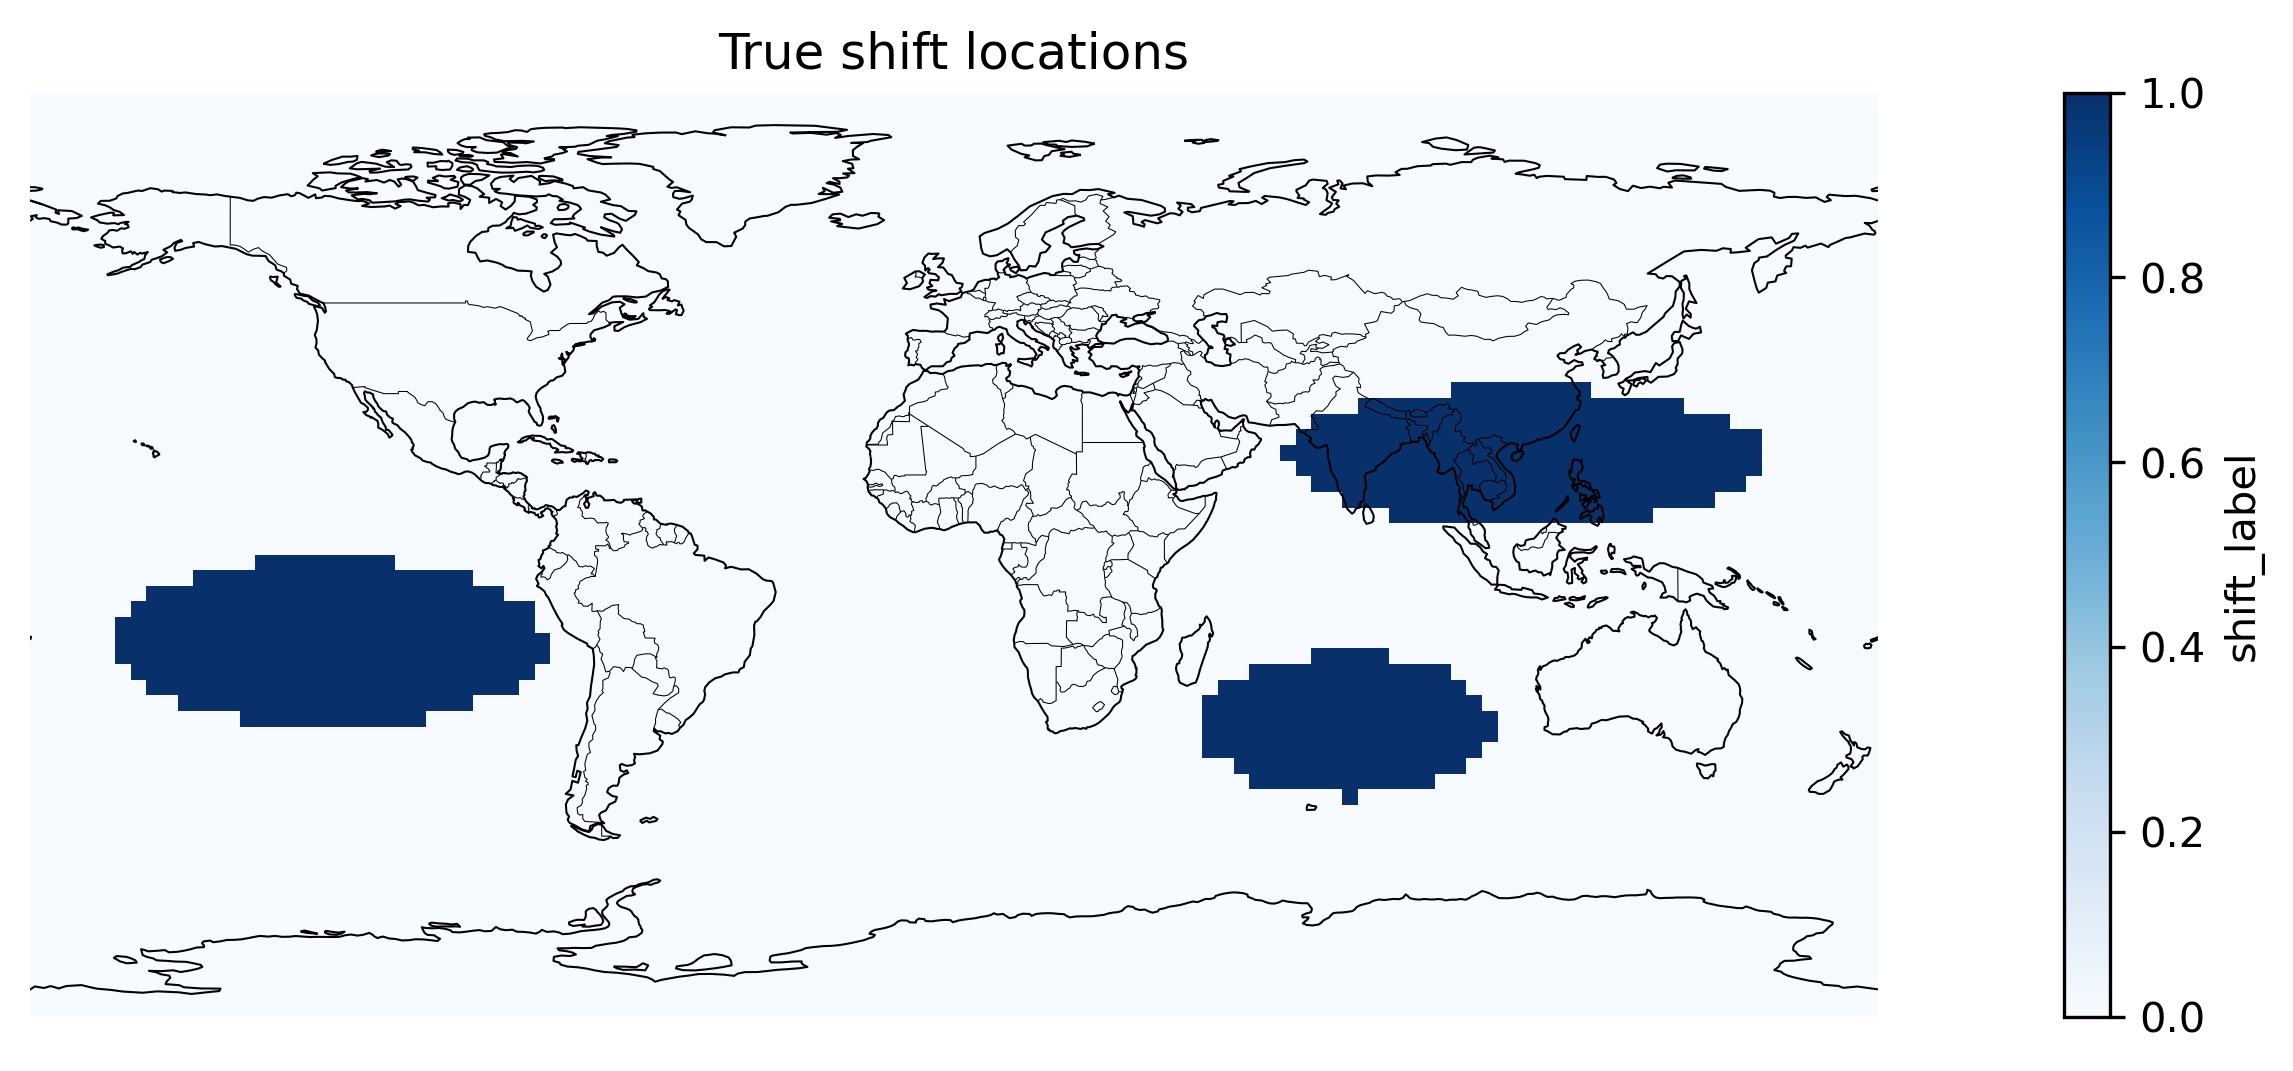

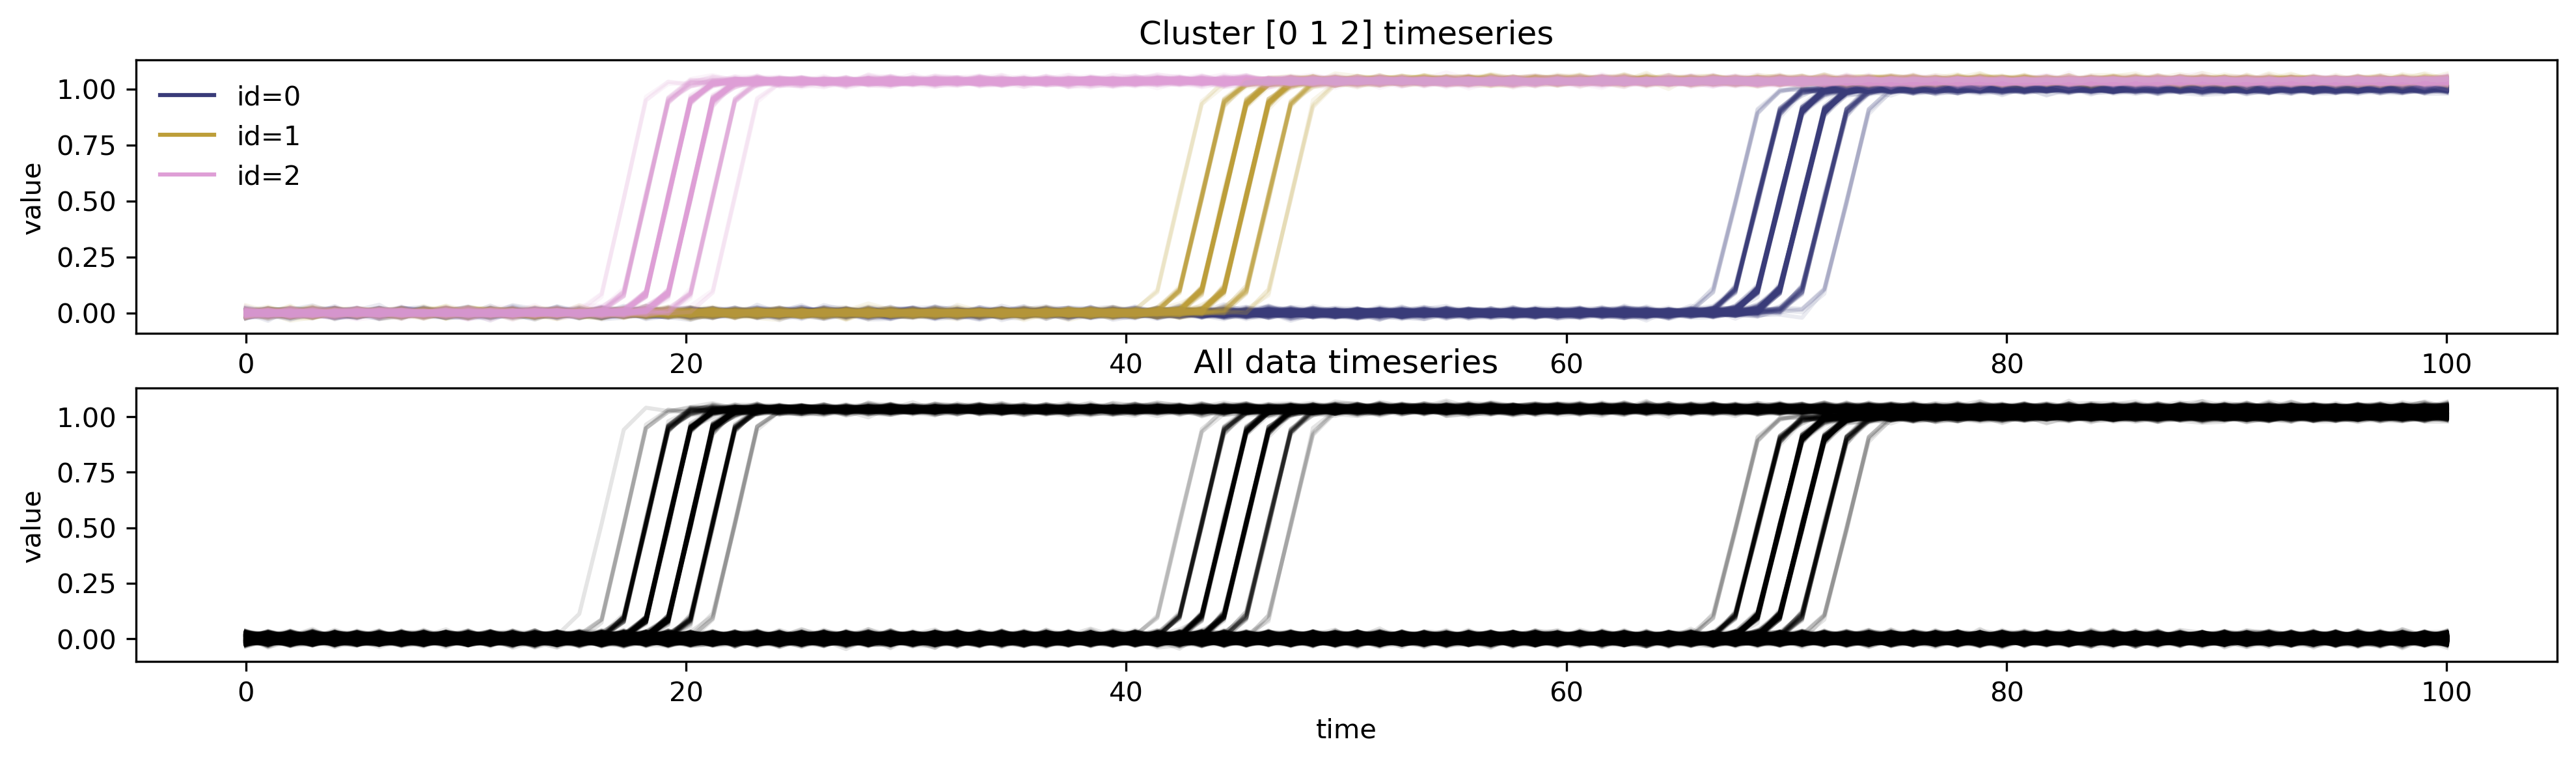

In [9]:
# plot(11)
plot(3)

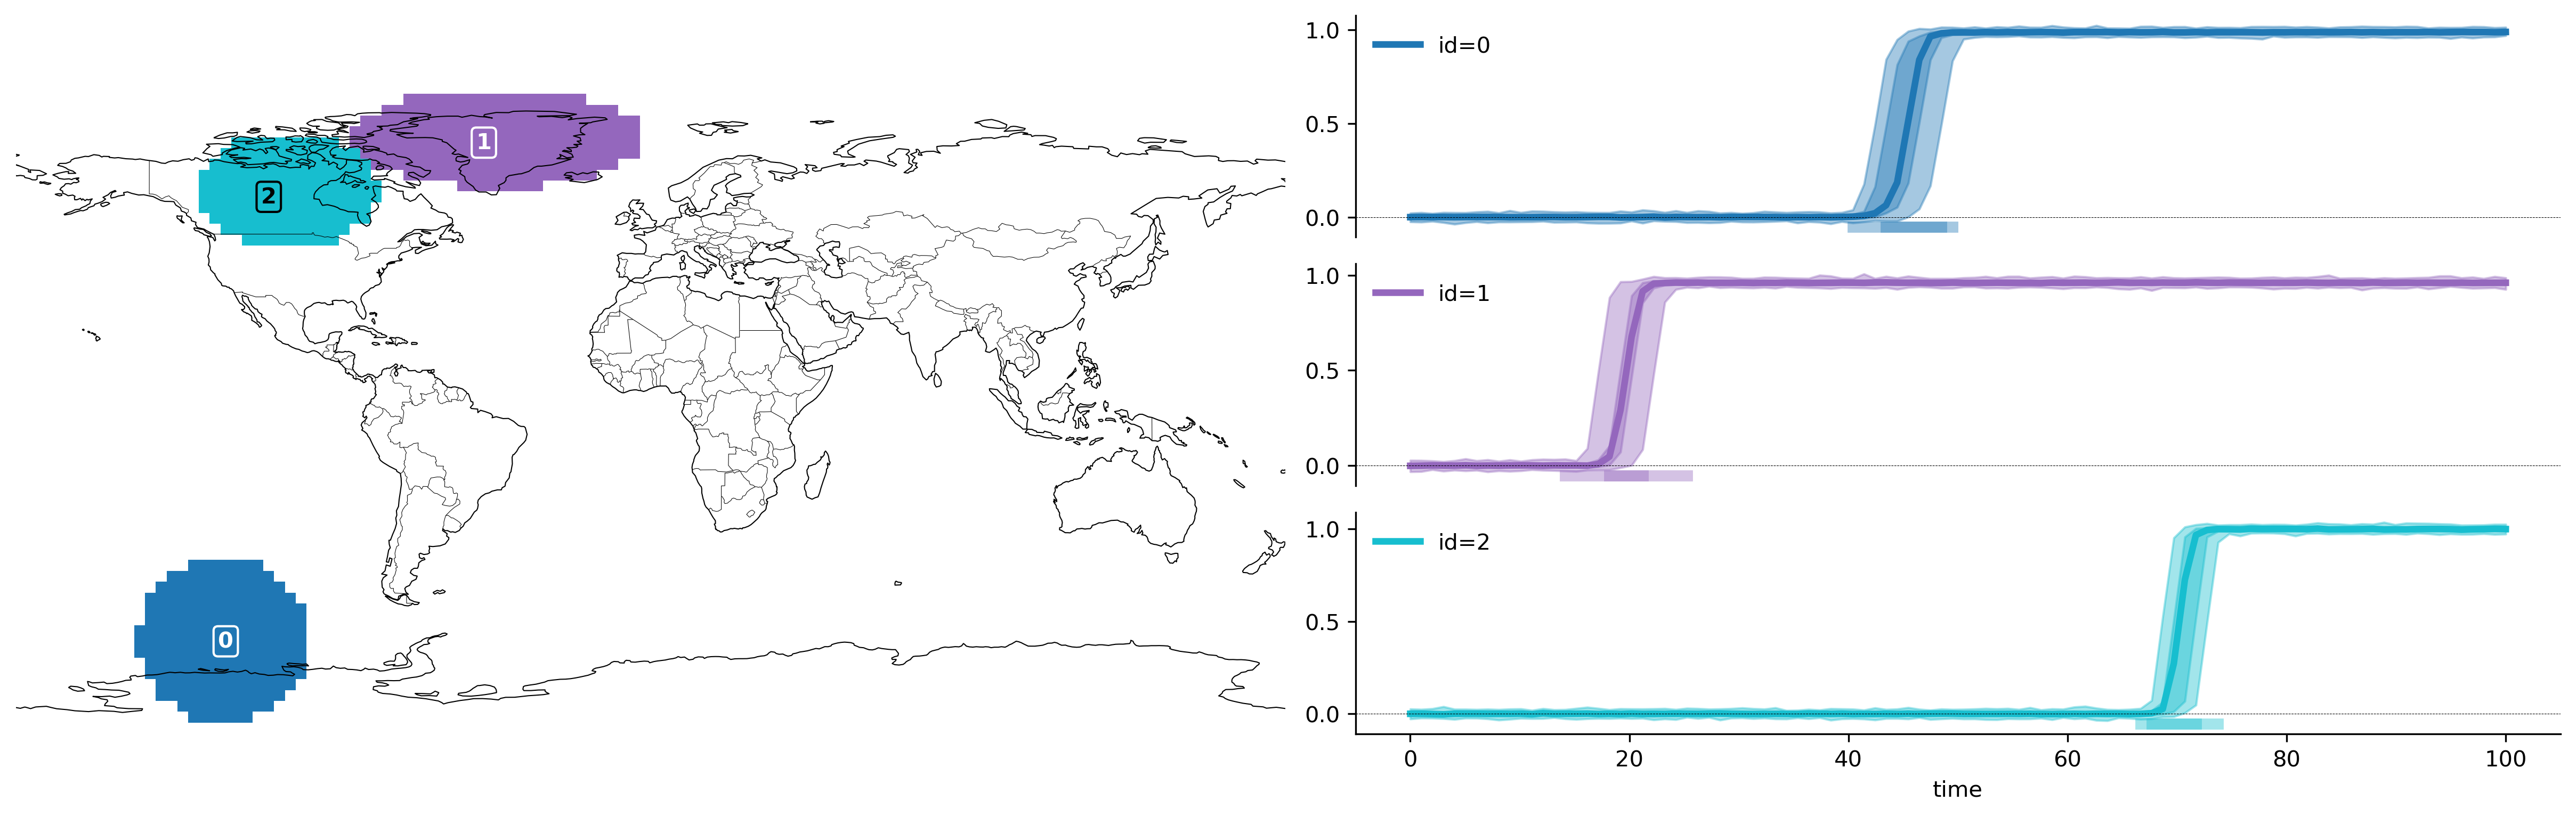

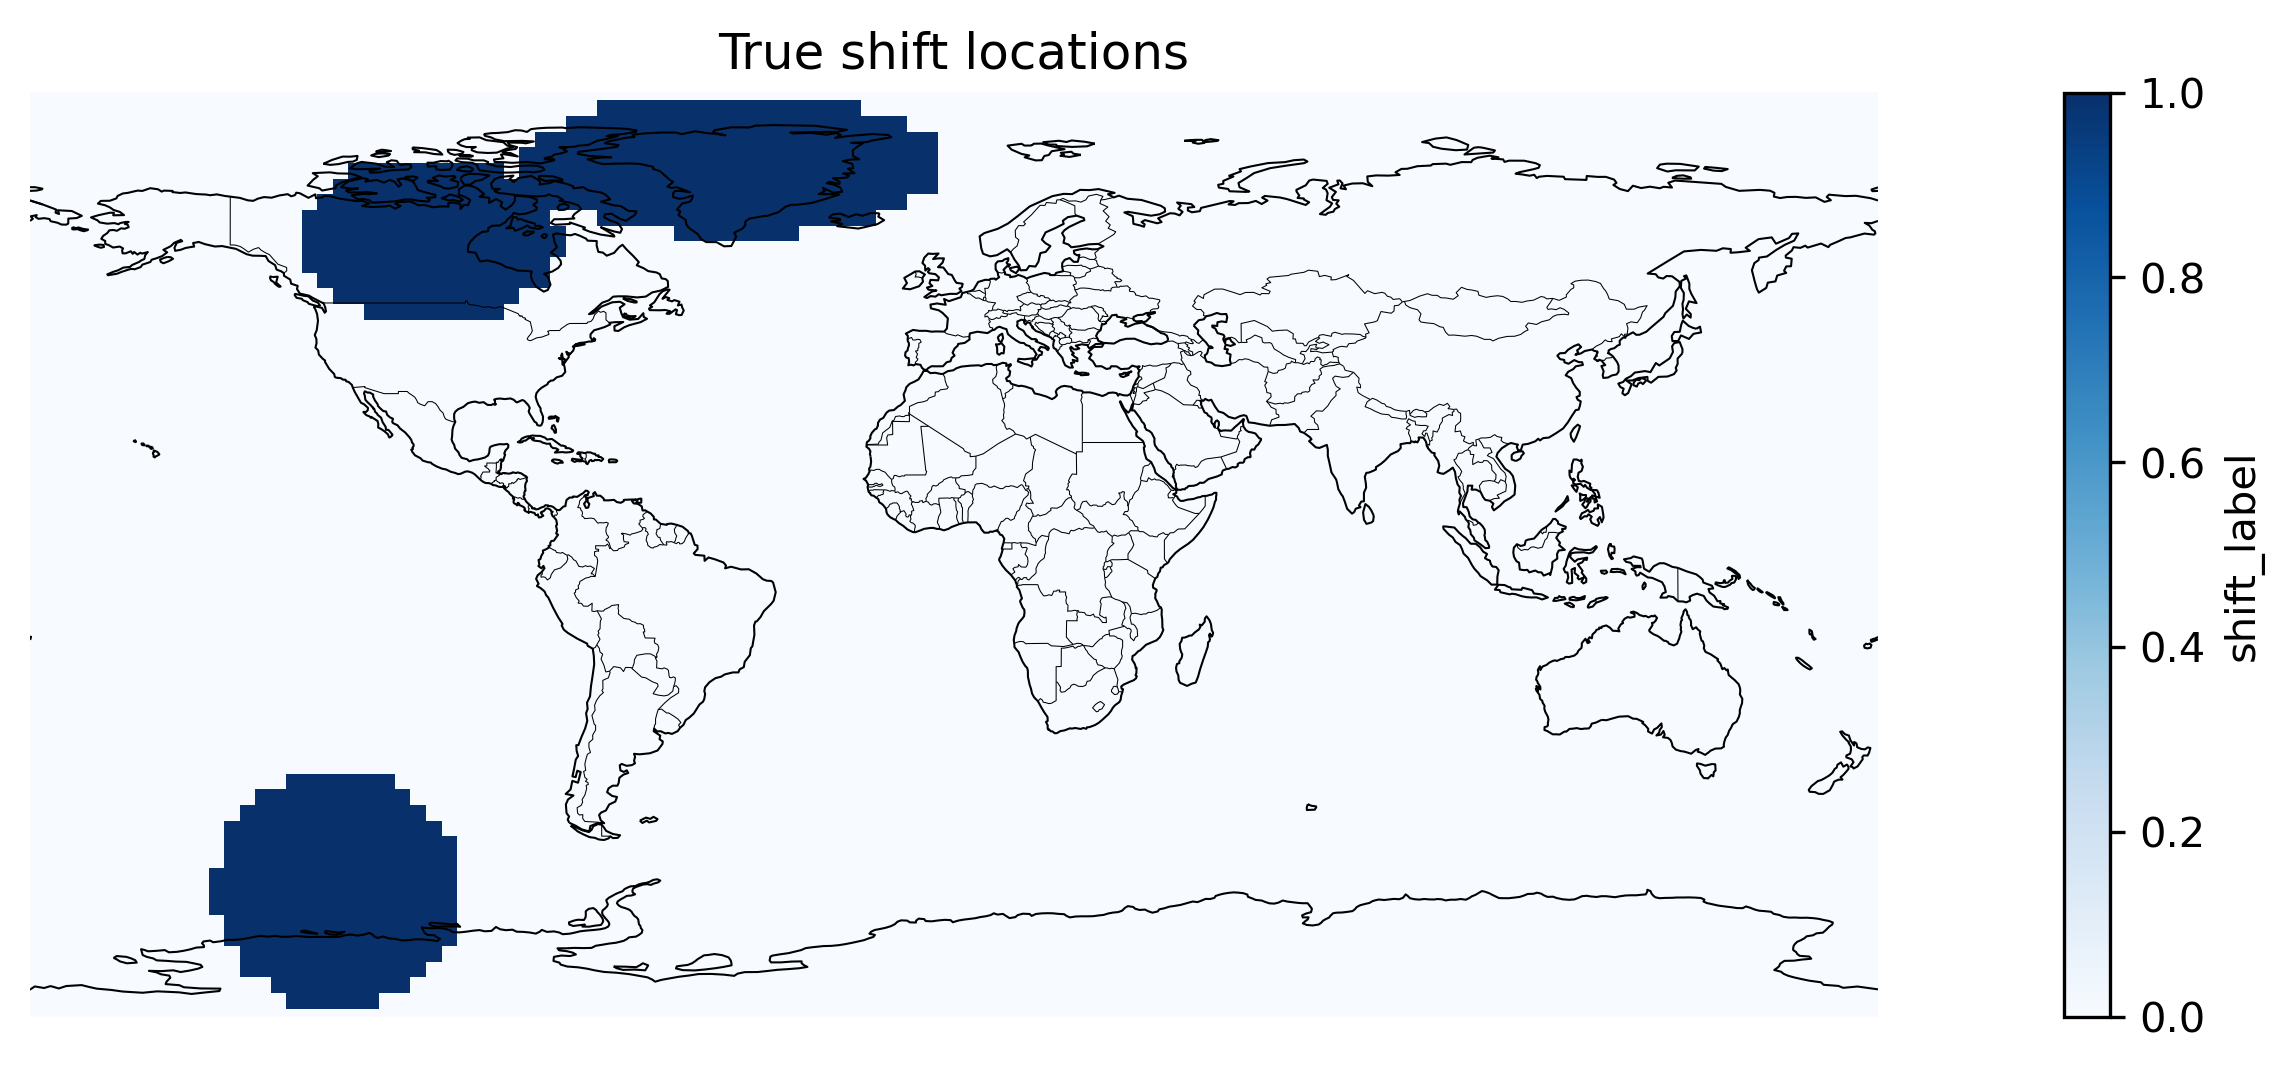

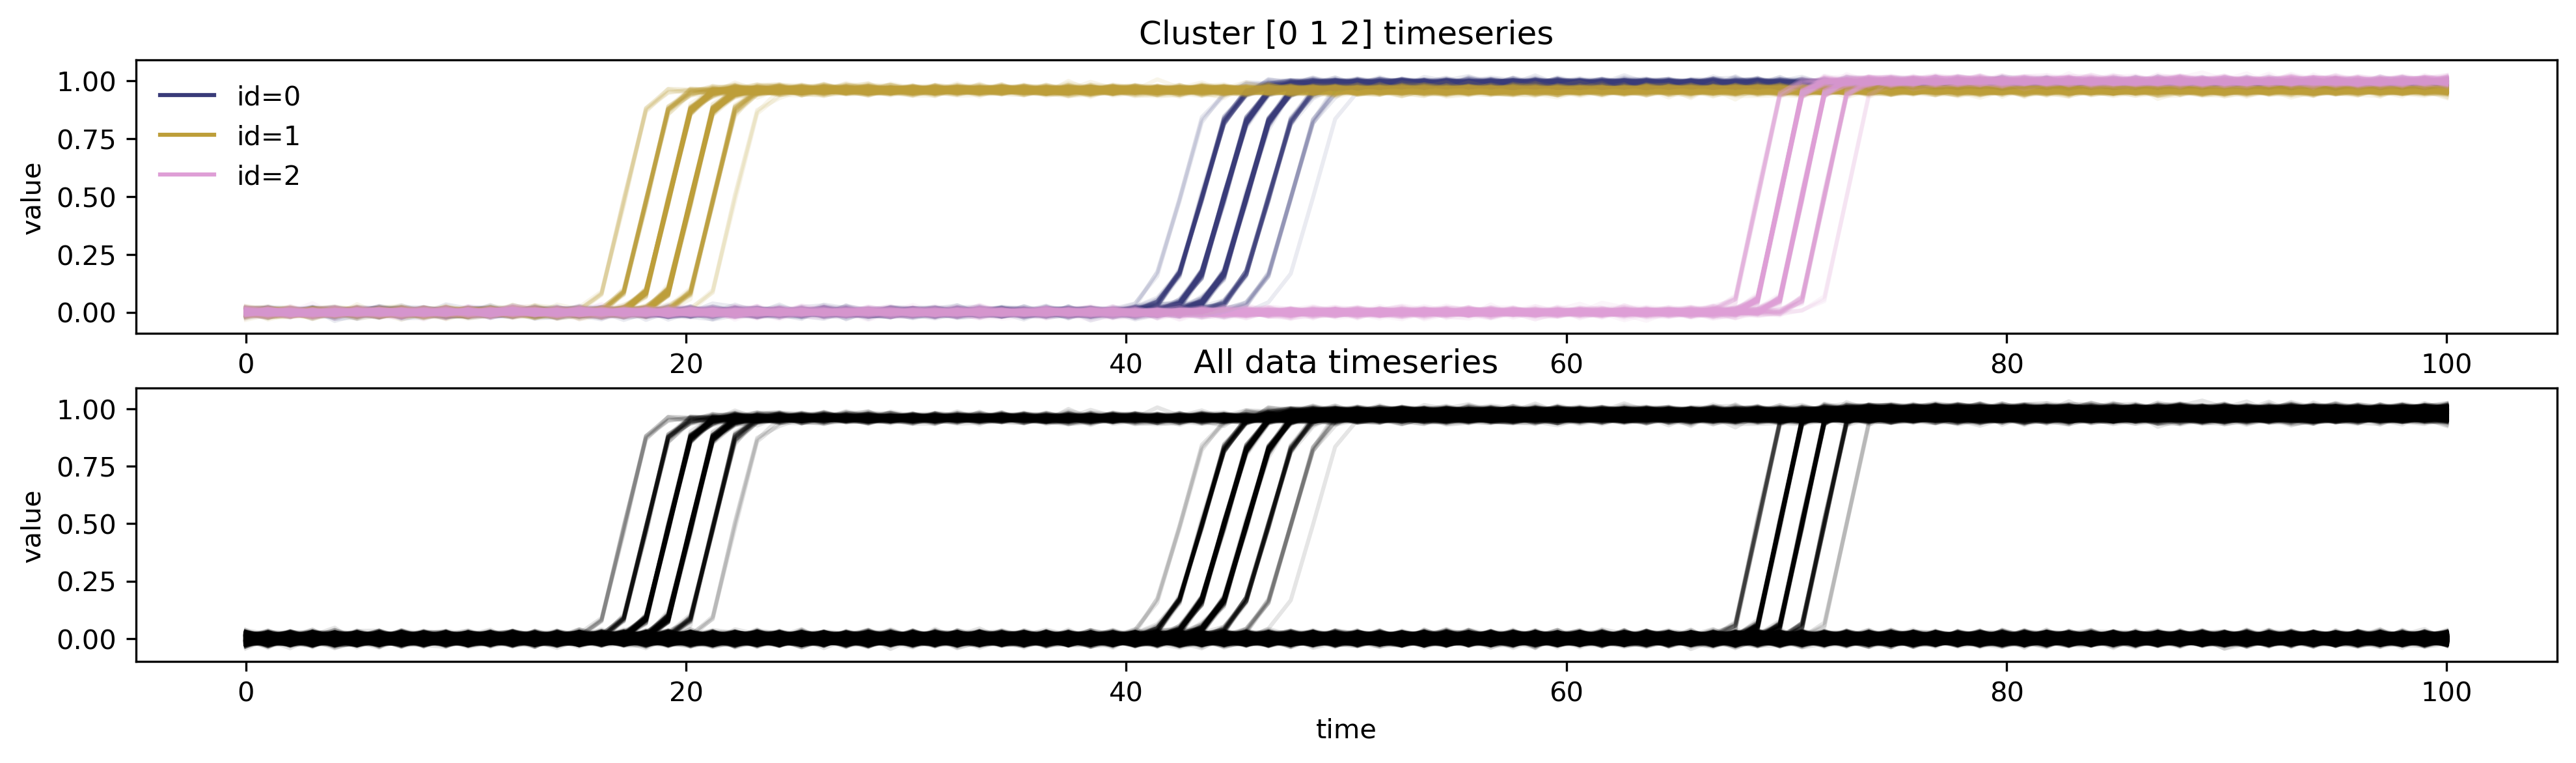

In [10]:
plot(6)

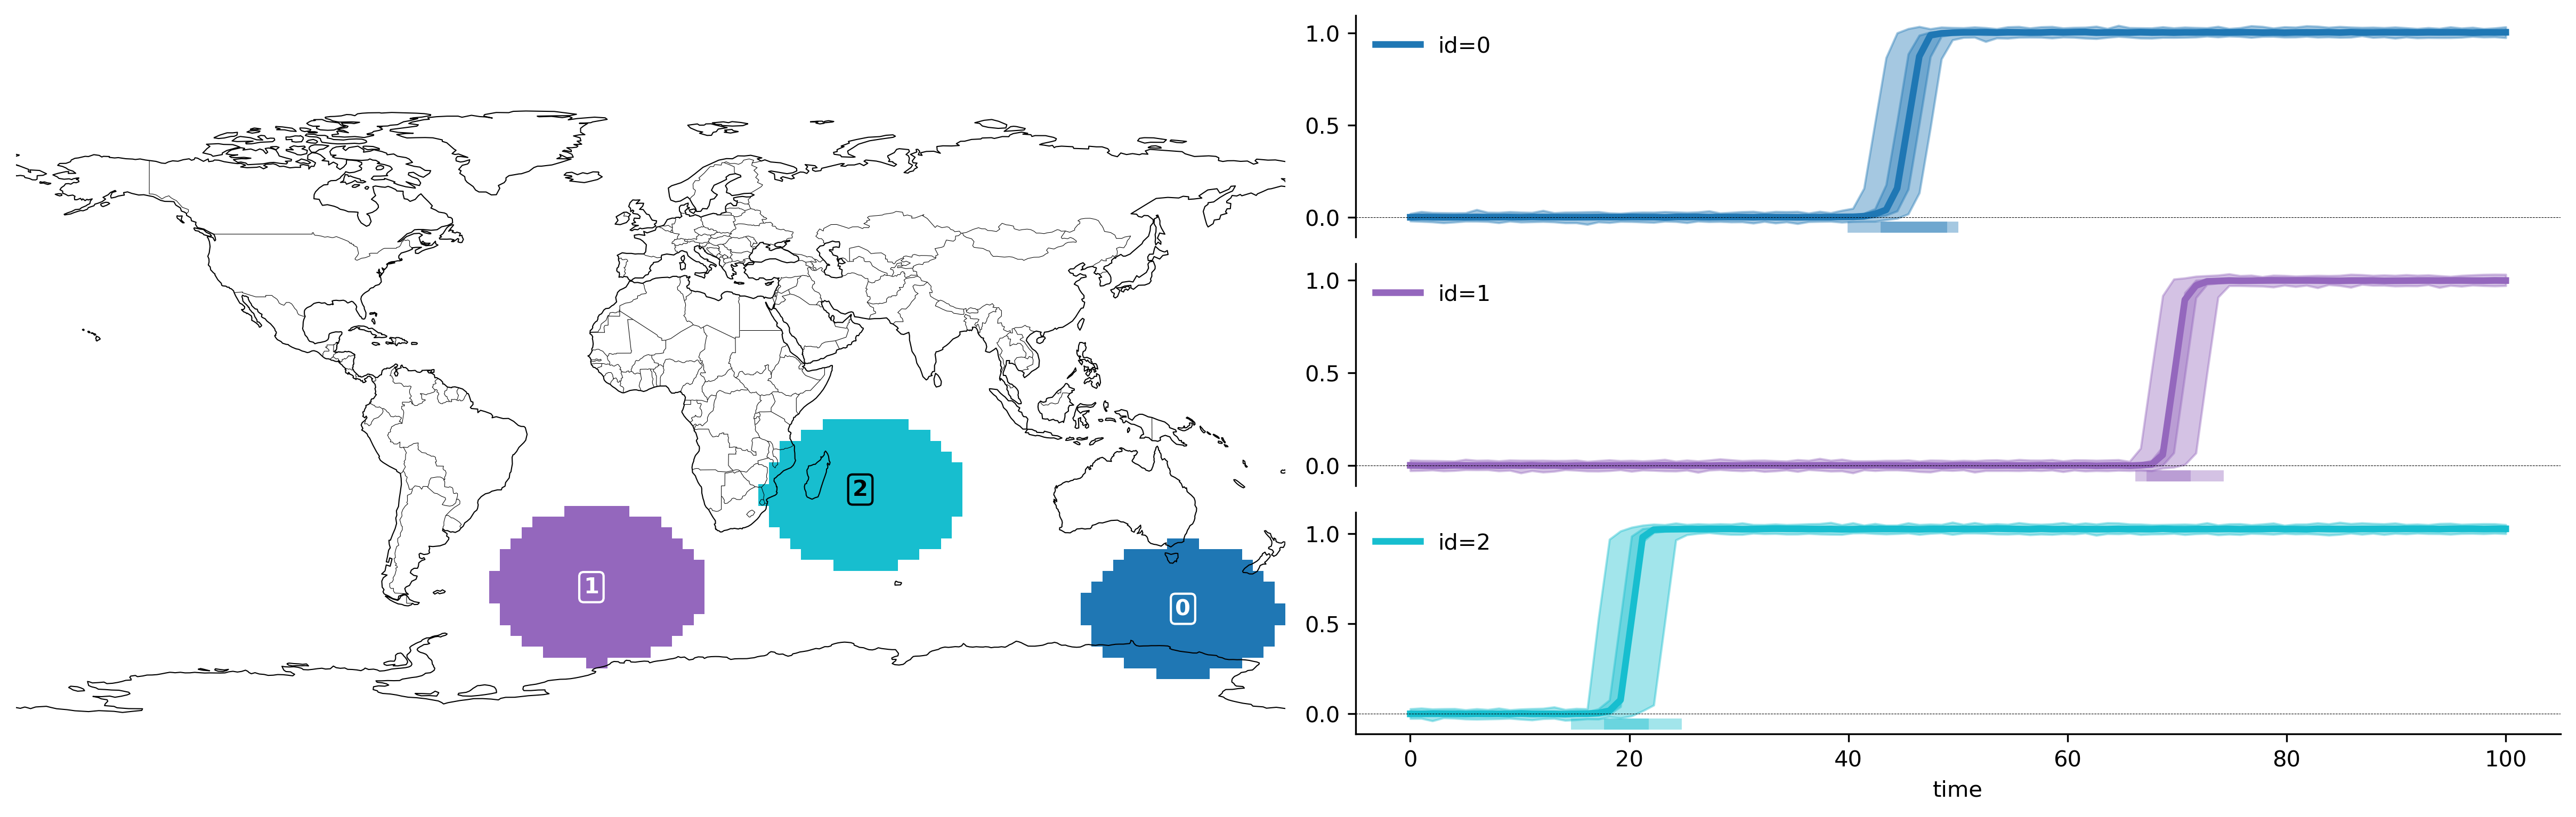

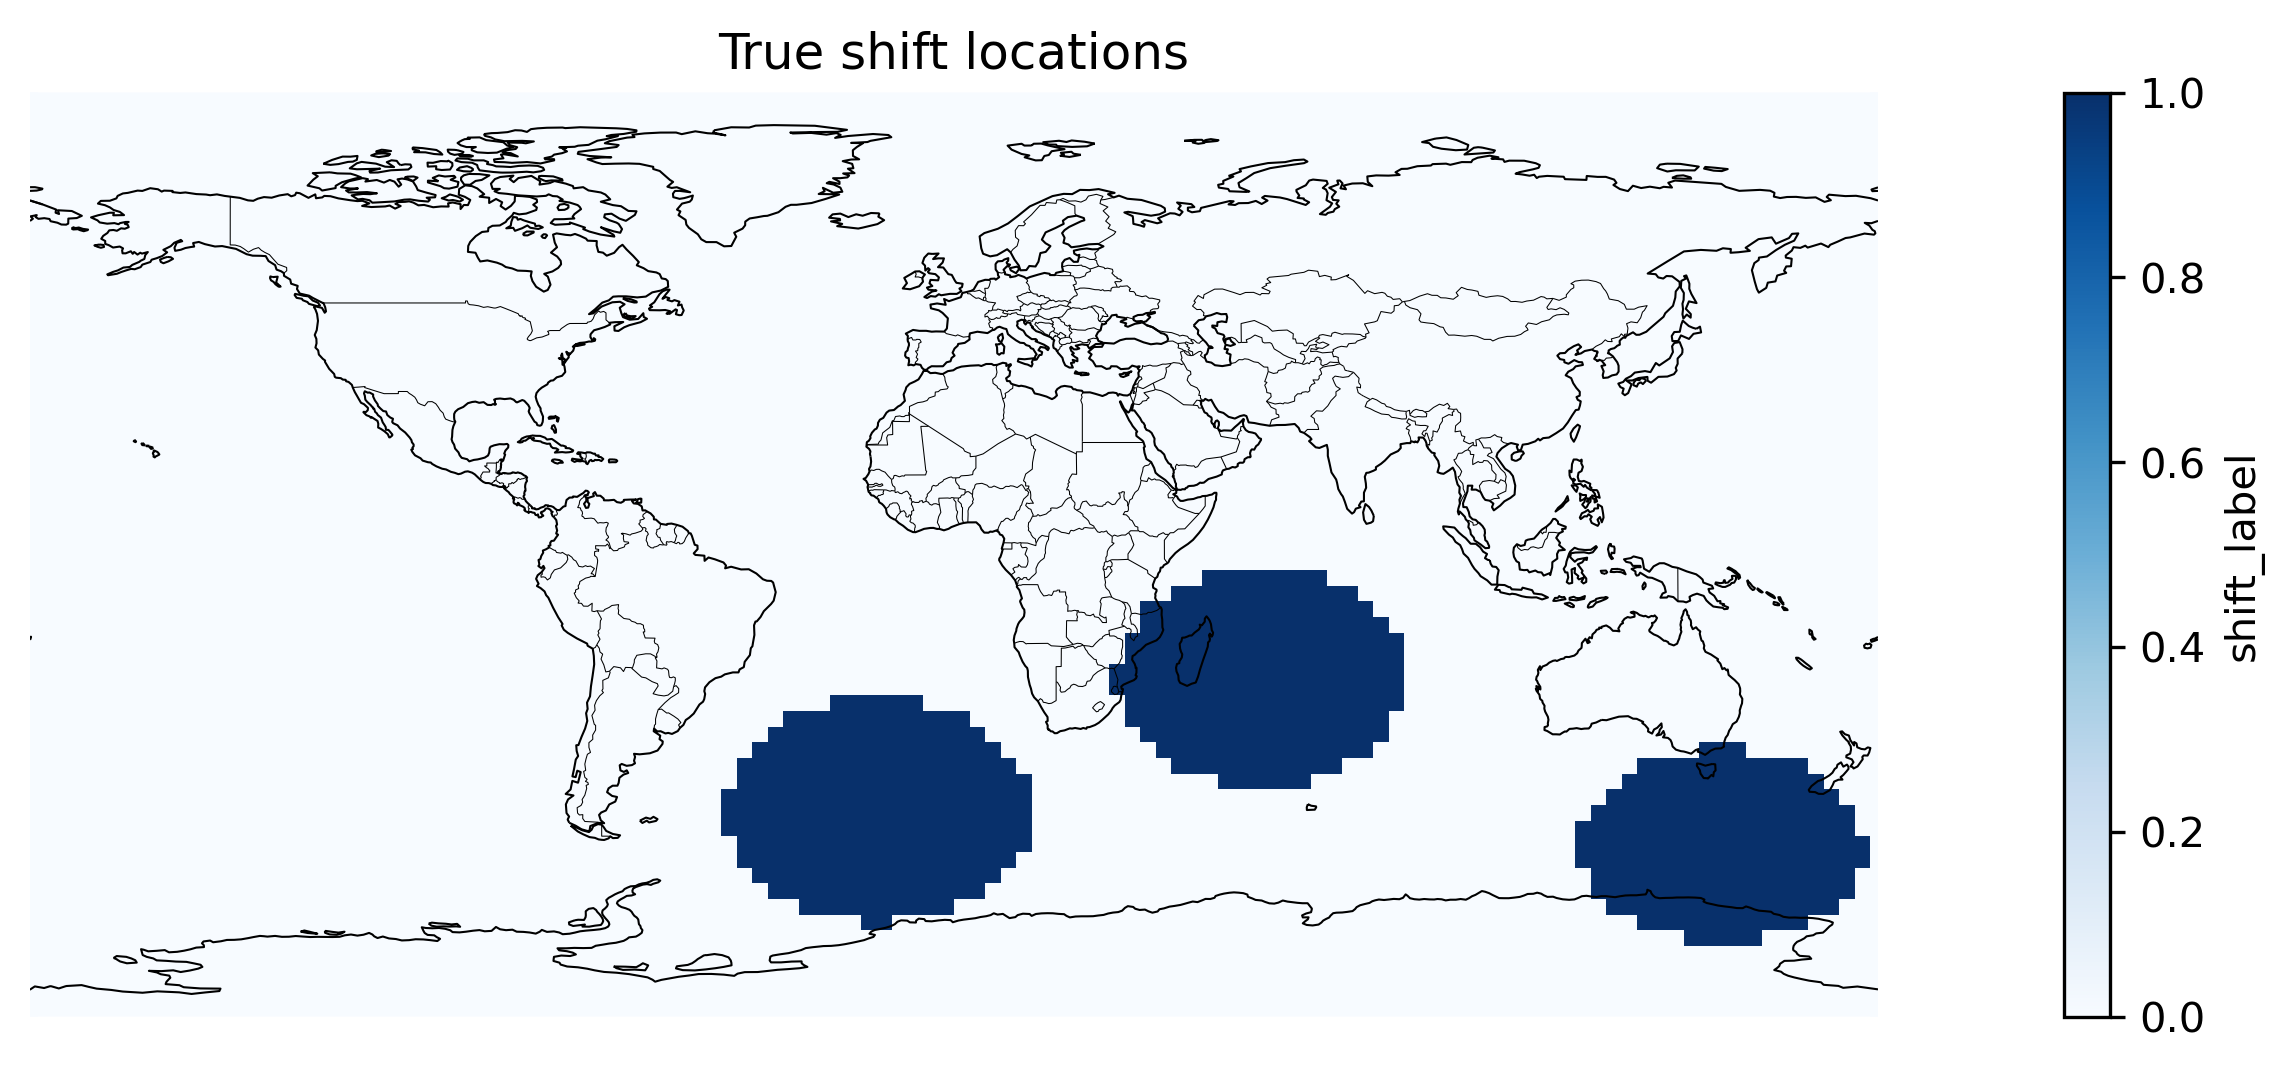

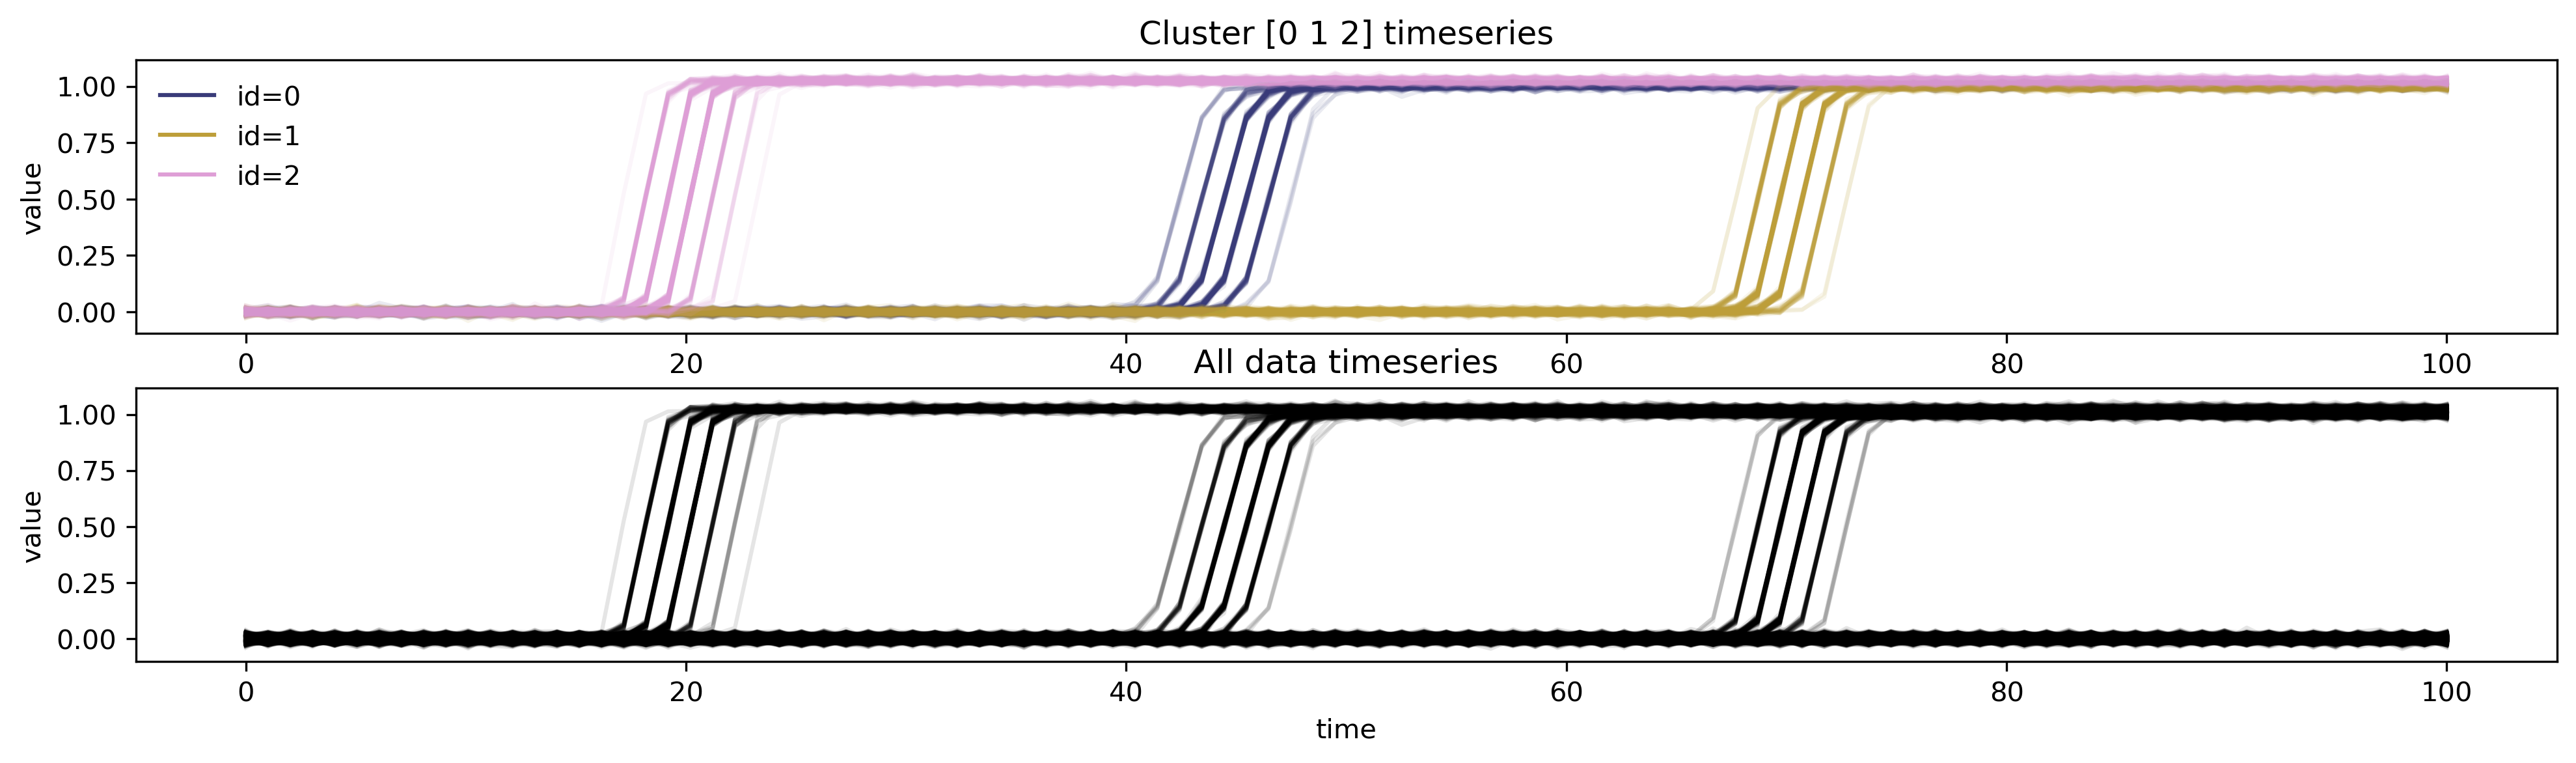

In [11]:
plot(12)